# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [ ]:
# !pip install tensorflow
# !pip install keras

Empezamos importando librerías

In [1]:
#import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers
import pandas as pd
import numpy as np

#### Clasificación

Utilizaremos el dataset de diabetes

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='Outcome').values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [5]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test.shape

Using TensorFlow backend.


(231, 2)

In [6]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: Para iniciar la red neuronal. No cuenta como capa.
* **Dense**: Es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [23]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(500, activation='relu', input_dim=8))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [24]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy']
             )

In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 500)               4500      
_________________________________________________________________
dense_10 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_11 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 102       
Total params: 59,752
Trainable params: 59,752
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [26]:
history = model.fit(X_train_scal,
                   y_train,
                   batch_size=64,
                   epochs = 100,
                    validation_split = 0.1
                   )

Train on 483 samples, validate on 54 samples
Epoch 1/100
483/483 [==============================] - 1s 1ms/step - loss: 0.6828 - accuracy: 0.6149 - val_loss: 0.6889 - val_accuracy: 0.6111
Epoch 2/100
483/483 [==============================] - 0s 91us/step - loss: 0.6435 - accuracy: 0.6729 - val_loss: 0.6780 - val_accuracy: 0.6111
Epoch 3/100
483/483 [==============================] - 0s 293us/step - loss: 0.6231 - accuracy: 0.6729 - val_loss: 0.6549 - val_accuracy: 0.6111
Epoch 4/100
483/483 [==============================] - 0s 342us/step - loss: 0.6063 - accuracy: 0.6770 - val_loss: 0.6499 - val_accuracy: 0.6111
Epoch 5/100
483/483 [==============================] - 0s 340us/step - loss: 0.5851 - accuracy: 0.6915 - val_loss: 0.6049 - val_accuracy: 0.6667
Epoch 6/100
483/483 [==============================] - 0s 468us/step - loss: 0.5658 - accuracy: 0.6998 - val_loss: 0.6020 - val_accuracy: 0.6667
Epoch 7/100
483/483 [==============================] - 0s 426us/step - loss: 0.5457 - ac

Epoch 57/100
483/483 [==============================] - 0s 547us/step - loss: 0.3553 - accuracy: 0.8530 - val_loss: 0.4164 - val_accuracy: 0.7963
Epoch 58/100
483/483 [==============================] - 0s 427us/step - loss: 0.3562 - accuracy: 0.8447 - val_loss: 0.4299 - val_accuracy: 0.7963
Epoch 59/100
483/483 [==============================] - 0s 292us/step - loss: 0.3536 - accuracy: 0.8364 - val_loss: 0.4765 - val_accuracy: 0.7593
Epoch 60/100
483/483 [==============================] - 0s 366us/step - loss: 0.3557 - accuracy: 0.8282 - val_loss: 0.4055 - val_accuracy: 0.8148
Epoch 61/100
483/483 [==============================] - 0s 323us/step - loss: 0.3498 - accuracy: 0.8427 - val_loss: 0.3995 - val_accuracy: 0.8148
Epoch 62/100
483/483 [==============================] - 0s 153us/step - loss: 0.3737 - accuracy: 0.8199 - val_loss: 0.4210 - val_accuracy: 0.8333
Epoch 63/100
483/483 [==============================] - 0s 341us/step - loss: 0.3860 - accuracy: 0.8219 - val_loss: 0.4736 -

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [11]:
print(history.params)
print(history.epoch)
print(history.history)

{'batch_size': 64, 'epochs': 100, 'steps': None, 'samples': 483, 'verbose': 1, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
{'val_loss': [0.6952014565467834, 0.6533388495445251, 0.6405861377716064, 0.6270946264266968, 0.5994778871536255, 0.5982920527458191, 0.5322456955909729, 0.5120011568069458, 0.5145694613456726, 0.5162142515182495, 0.4587197005748749, 0.49424394965171814, 0.49085161089897156, 0.440622478723526, 0.4851926565170288, 0.4675239622592926, 0.42044106125831604, 0.4670822322368622, 0.4215099513530731, 0.4045589566230774, 0.42285099625587463, 0.4389611

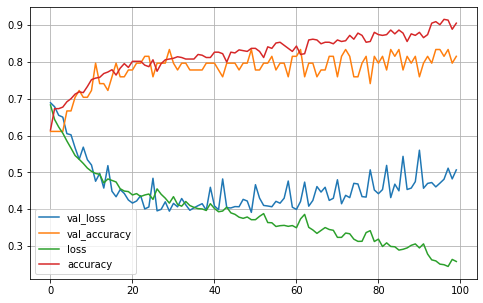

In [27]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()

plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Medimos el desempeño

In [33]:
np.argmax(model.predict(X_train_scal),axis=1)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
pred_train = np.argmax(model.predict(X_train_scal),axis=1)
print(classification_report(np.argmax(y_train,axis=1),pred_train))
confusion_matrix(np.argmax(y_train,axis=1),pred_train)

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       358
           1       0.79      0.88      0.83       179

    accuracy                           0.88       537
   macro avg       0.86      0.88      0.87       537
weighted avg       0.89      0.88      0.88       537



array([[316,  42],
       [ 22, 157]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
pred_test= np.argmax(model.predict(X_test_scal),axis=1)
print(classification_report(np.argmax(y_test,axis=1),pred_test))
confusion_matrix(np.argmax(y_test,axis=1),pred_test)

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       142
           1       0.61      0.70      0.65        89

    accuracy                           0.71       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.72      0.71      0.71       231



array([[102,  40],
       [ 27,  62]], dtype=int64)

**Regresión**

In [38]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


En este ejemplo, preparamos nuestro conjunto de validación

In [40]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                             housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = MinMaxScaler()
scaler2 = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

y_train = scaler2.fit_transform(y_train.reshape(-1, 1))
y_valid = scaler2.transform(y_valid.reshape(-1, 1))

In [44]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [46]:
model = keras.models.Sequential([
    keras.layers.Dense(input_shape = X_train.shape[1:],
                      units=7,
                      activation='tanh'),
    keras.layers.Dense(units=1)
])

model.compile(loss = "mean_squared_error", 
             optimizer="adam")

history = model.fit(X_train,
                   y_train,
                   epochs=50,
                   validation_data = (X_valid, y_valid)
                   )

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 9s 740us/sample - loss: 0.0549 - val_loss: 0.0289
Epoch 2/50
11610/11610 [==============================] - 8s 697us/sample - loss: 0.0288 - val_loss: 0.0264
Epoch 3/50
11610/11610 [==============================] - 8s 657us/sample - loss: 0.0272 - val_loss: 0.0254
Epoch 4/50
11610/11610 [==============================] - 5s 452us/sample - loss: 0.0263 - val_loss: 0.0247 
Epoch 5/50
11610/11610 [==============================] - 10s 901us/sample - loss: 0.0255 - val_loss: 0.0237 - ETA: 2s -  - ETA: 
Epoch 6/50
11610/11610 [==============================] - 5s 465us/sample - loss: 0.0249 - val_loss: 0.0233lo
Epoch 7/50
11610/11610 [==============================] - 7s 630us/sample - loss: 0.0244 - val_loss: 0.0227
Epoch 8/50
11610/11610 [============================

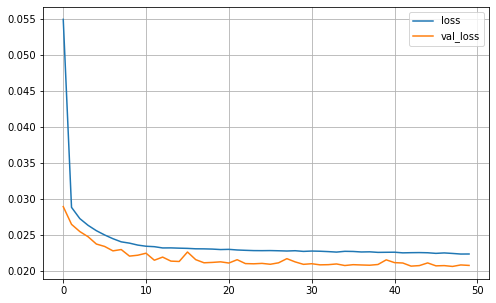

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [49]:
mse_test = model.evaluate(X_test,y_test)
print(mse_test)
model.predict(X_test)

5160/5160 [==============================] - 1s 219us/sample - loss: 3.6415
3.6415114558020303


array([[0.2394506 ],
       [0.41565105],
       [0.15700372],
       ...,
       [0.7902633 ],
       [0.29172844],
       [0.3350107 ]], dtype=float32)

In [50]:
# Predecir en test y desnormalizar
pred_test = model.predict(X_test)
pred_test2 = scaler2.inverse_transform(pred_test)
pred_test2

array([[1.3113302],
       [2.165906 ],
       [0.9114612],
       ...,
       [3.9827826],
       [1.5648787],
       [1.7747985]], dtype=float32)

In [51]:
# Medimos desempeño 
from sklearn.metrics import mean_squared_error, r2_score
mse_2 = mean_squared_error(pred_test2,y_test)
r2_2 = r2_score(pred_test2,y_test)
print ("Test ERROR = ", mse_2)
print ("Test R2 = ", r2_2)

Test ERROR =  0.5018129021592475
Test R2 =  0.39612032910325234


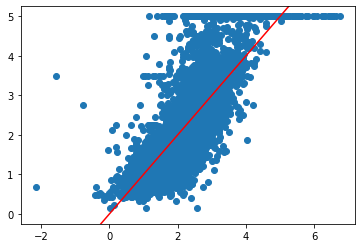

In [52]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(pred_test2,y_test,'o')
plt.axline([0,0],[1,1],color='red')

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [53]:
model.save('my_keras_model.h5')

In [54]:
# Lo volvemos a cargar
model = keras.models.load_model('my_keras_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [56]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")

history = model.fit(
    X_train,
    y_train,
    epochs=20,
    callbacks = [checkpoint_cb]
)

Epoch 1/20
11610/11610 [==============================] - 4s 386us/sample - loss: 0.0223s - loss:
Epoch 2/20
11610/11610 [==============================] - 5s 392us/sample - loss: 0.0223s - loss: - E - ETA: 0s - los
Epoch 3/20
11610/11610 [==============================] - 5s 397us/sample - loss: 0.0223
Epoch 4/20
11610/11610 [==============================] - 3s 239us/sample - loss: 0.0222
Epoch 5/20
11610/11610 [==============================] - 3s 243us/sample - loss: 0.0223s  - ETA: 0s - loss:
Epoch 6/20
11610/11610 [==============================] - 2s 192us/sample - loss: 0.0223
Epoch 7/20
11610/11610 [==============================] - 2s 174us/sample - loss: 0.0222
Epoch 8/20
11610/11610 [==============================] - 2s 182us/sample - loss: 0.0222
Epoch 9/20
11610/11610 [==============================] - 3s 288us/sample - loss: 0.0222TA: 0s - loss: 0
Epoch 10/20
11610/11610 [==============================] - 4s 354us/sample - loss: 0.0221
Epoch 11/20
11610/11610 [==========

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [57]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3,
                                                 restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    callbacks = [checkpoint_cb, early_stopping_cb],
    validation_data = (X_valid, y_valid)
)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 7s 614us/sample - loss: 0.0219 - val_loss: 0.0200
Epoch 2/100
11610/11610 [==============================] - 6s 555us/sample - loss: 0.0219 - val_loss: 0.0203 - loss: 0. - ET
Epoch 3/100
11610/11610 [==============================] - 7s 639us/sample - loss: 0.0217 - val_loss: 0.0200
Epoch 4/100
11610/11610 [==============================] - 8s 647us/sample - loss: 0.0218 - val_loss: 0.0201
